In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np
import pycircstat
from scipy import signal           # import signal module from scipy

fig_w, fig_h = (12, 8)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

ModuleNotFoundError: No module named 'pycircstat'

In [2]:
import scipy.io

mat = scipy.io.loadmat('regionsMap.mat')

print('contents of file regionsMap.mat  (matlab < v7.3):')
for key in mat:
    print(key, type(mat[key]))
    
regionsMap = mat['regionsMap'][::]

print()
print(regionsMap[:5])

FileNotFoundError: [Errno 2] No such file or directory: 'regionsMap.mat'

In [3]:
import h5py

f = h5py.File('source_activity.mat', 'r')

contents = {}
print('Contents of file "regionsMap.mat" (matlab v7.3):')
for key in list(f.keys()):
    contents[key] = f[key]
    print(key, '\t', contents[key])
    
print('\nContents of HDF5 group "source_activity":')
for subkey in list(contents['source_activity'].keys()):
    print(subkey, '\t', contents['source_activity'][subkey])
    
# for key in keys:
#     print(key)

OSError: Unable to open file (unable to open file: name = 'source_activity.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
contents['source_activity_to_SC_regions_map']

<HDF5 dataset "source_activity_to_SC_regions_map": shape (1, 68), type "<f8">

In [5]:
contents['source_activity_to_SC_regions_map'][::]

array([[1001., 2001., 1002., 2002., 1003., 2003., 1005., 2005., 1006.,
        2006., 1032., 2032., 1007., 2007., 1008., 2008., 1009., 2009.,
        1035., 2035., 1010., 2010., 1011., 2011., 1012., 2012., 1013.,
        2013., 1014., 2014., 1015., 2015., 1017., 2017., 1016., 2016.,
        1018., 2018., 1019., 2019., 1020., 2020., 1021., 2021., 1022.,
        2022., 1023., 2023., 1024., 2024., 1025., 2025., 1026., 2026.,
        1027., 2027., 1028., 2028., 1029., 2029., 1030., 2030., 1031.,
        2031., 1033., 2033., 1034., 2034.]])

In [6]:
contents['source_activity']['atlas'][::]

array([[<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>],
       [<HDF5 object reference>]], dtype=object)

In [7]:
f[contents['source_activity']['atlas'][0][0]]

<HDF5 group "/#refs#/Nt" (2 members)>

In [8]:
list(f[contents['source_activity']['atlas'][0][0]].keys())

['Name', 'Scouts']

In [9]:
f[contents['source_activity']['atlas'][0][0]]['Name']

<HDF5 dataset "Name": shape (21, 1), type "<u2">

In [10]:
f[contents['source_activity']['atlas'][0][0]]['Name'][::]

array([[112],
       [114],
       [111],
       [ 99],
       [101],
       [115],
       [115],
       [ 95],
       [101],
       [120],
       [116],
       [114],
       [ 97],
       [ 99],
       [116],
       [ 95],
       [115],
       [ 99],
       [111],
       [117],
       [116]], dtype=uint16)

In [11]:
list(f[contents['source_activity']['atlas'][0][0]]['Scouts'].keys())

['Color', 'Function', 'Handles', 'Label', 'Region', 'Seed', 'Vertices']

In [12]:
f[contents['source_activity']['atlas'][0][0]]['Scouts']['Color']

<HDF5 dataset "Color": shape (68, 1), type "|O">

In [13]:
f[f[contents['source_activity']['atlas'][0][0]]['Scouts']['Color'][0][0]][::]

array([[0.09803922],
       [0.39215686],
       [0.15686275]])

In [14]:
f[contents['source_activity']['sub_id'][0,0]]

<HDF5 dataset "Cc": shape (11, 1), type "<u2">

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:46: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


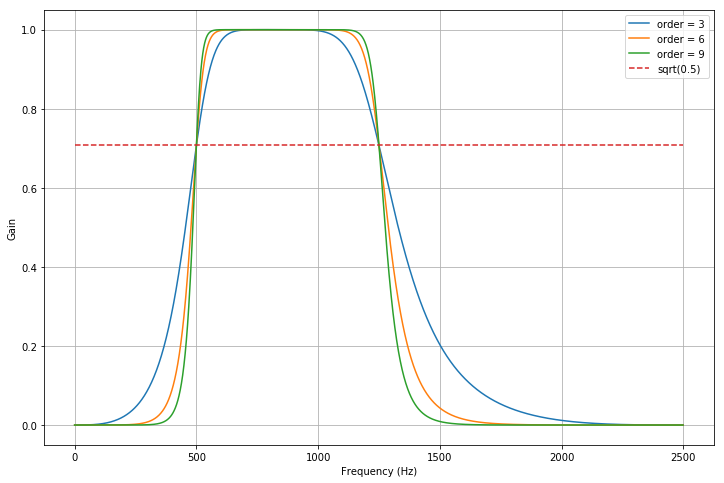

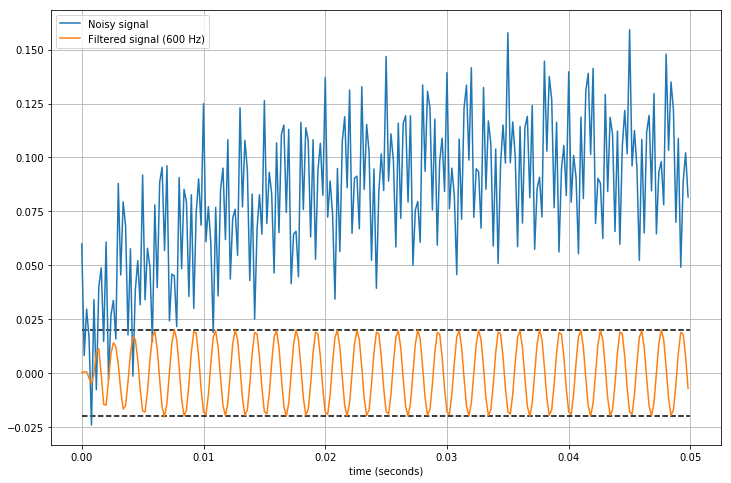

In [15]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
    
    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [16]:
c = f[contents['source_activity']['ts'][1,0]][::]

In [78]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=1):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filter_session(data,lowcut,highcut,fs,order=1):
    channels = np.shape(data)[1]
    filtered = np.zeros(np.shape(data))
    for channel in range(channels):
        filt_chan = butter_bandpass_filter(c[:,channel], lowcut, highcut, fs, order=order)
        filtered[:,channel] = filt_chan
    return filtered

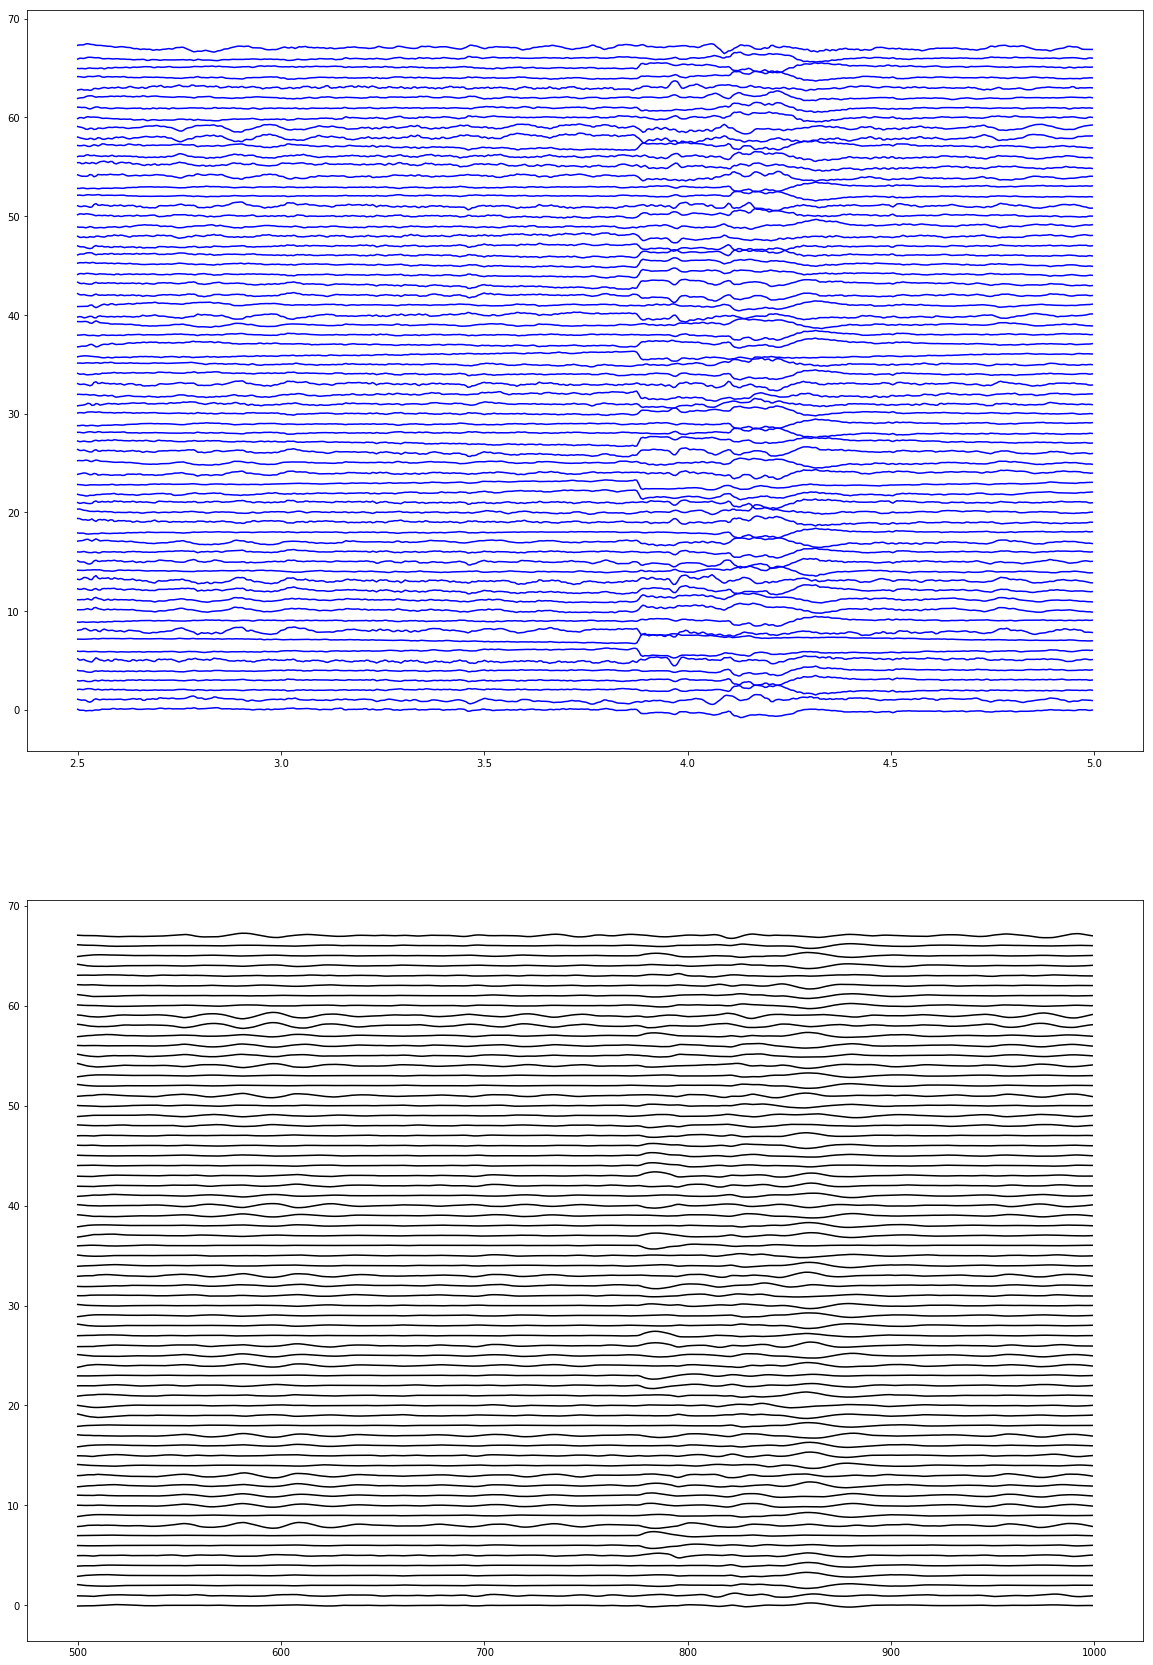

In [130]:
# Sample rate and desired cutoff frequencies (in Hz).
channel = 0
fs = 200.0
lowcut = 4.0
highcut = 8.0
T = 1/fs
t = np.arange(0,np.shape(c)[0])/200
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
alpha = np.zeros(np.shape(c))
for channel in range(68):
    filtered = butter_bandpass_filter(c[:,channel], lowcut, highcut, fs, order=1)
    alpha[:,channel] = filtered
    t_range = range(500,1000)
    data = c[t_range,channel]
    data_min = np.min(data)
    data_max = np.max(data)
    data_scale = data_max-data_min
    axes[0].plot(t[t_range],data/data_scale+channel,'b')
    #y = butter_bandpass_filter(data, lowcut, highcut, fs, order=1)
    axes[1].plot(t_range,filtered[t_range]/data_scale+channel,'k')
plt.show()

In [69]:
np.shape(alpha)

(259184, 68)

In [70]:
hilbert_alpha = signal.hilbert(alpha,axis=0)
amplitude_alpha = np.abs(hilbert_alpha)
phase_alpha = np.angle(hilbert_alpha)
np.shape(hilbert_alpha)

(259184, 68)

In [71]:
scipy.stats.pearsonr(amplitude_alpha[:,0], amplitude_alpha[:,1])

(0.5691331656855947, 0.0)

In [81]:
mean_angle = np.mean(phase_alpha,axis=0)

(68,)

In [72]:
corr_alpha_amp = np.corrcoef(amplitude_alpha,rowvar=False)

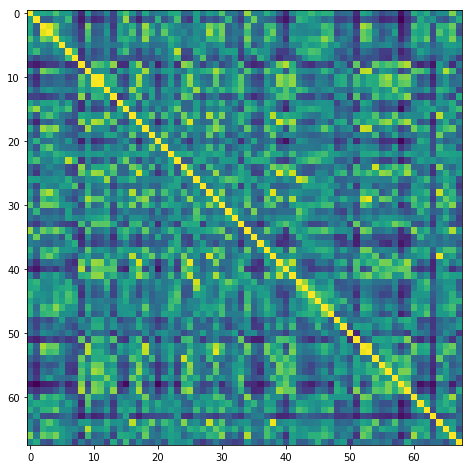

In [73]:
plt.imshow(corr_alpha_amp)
plt.show()

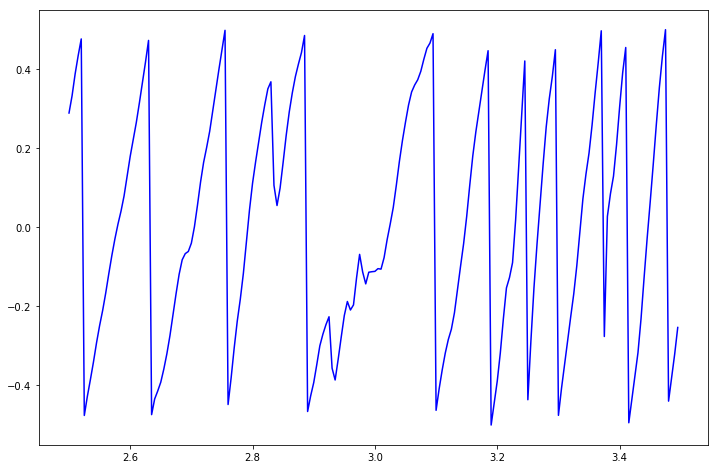

In [74]:
for channel in range(1):
    t_range = range(500,700)
    data = phase_alpha[t_range,channel]
    data_min = np.min(data)
    data_max = np.max(data)
    data_scale = data_max-data_min
    plt.plot(t[t_range],data/data_scale+channel,'b')
plt.show()

In [ ]:
channel = 0
fs = 200.0
lowcut = 8.0
highcut = 12.0
T = 1/fs
t = np.arange(0,np.shape(c)[0])/200
fig, axes = plt.subplots(nrows=2, figsize=(20,30))
alpha = np.zeros(np.shape(c))
for channel in range(68):
    filtered = butter_bandpass_filter(c[:,channel], lowcut, highcut, fs, order=1)
    alpha[:,channel] = filtered
    t_range = range(500,1000)
    data = c[t_range,channel]
    data_min = np.min(data)
    data_max = np.max(data)
    data_scale = data_max-data_min
    axes[0].plot(t[t_range],data/data_scale+channel,'b')
    #y = butter_bandpass_filter(data, lowcut, highcut, fs, order=1)
    axes[1].plot(t_range,filtered[t_range]/data_scale+channel,'k')
plt.show()

In [76]:
np.shape(c)[1]

68

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=1):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def filter_session(data,lowcut,highcut,fs,order=1):
    channels = np.shape(data)[1]
    filtered = np.zeros(np.shape(data))
    for channel in range(channels):
        filt_chan = butter_bandpass_filter(c[:,channel], lowcut, highcut, fs, order=order)
        filtered[:,channel] = filt_chan
    return filtered

## theta = 4,8
## alpha = 8,12
## beta = 12,40
## gamma = 40,50

In [ ]:
n_subject = 15
bands_amplitude = np.zeros((68, 68,4))
band_list = [(4,8),(8,12),(12,40),(40,50)]
for band_idx, band_pass in enumerate(band_list):  
    
    collection = np.zeros((68, 68,n_subject))
    
    for session_idx in range(n_subject):
        
        session = f[contents['source_activity']['ts'][session_idx,0]][::]
        
        filtered = filter_session(session,band_pass[0],band_pass[1],200)
        
        hilbert_filtered = signal.hilbert(filtered,axis=0)
        
        amplitude_filtered = np.abs(hilbert_filtered)
        
        #phase_filtered = np.angle(hilbert_filtered)
        
        corr_filtered_amp = np.corrcoef(amplitude_filtered,rowvar=False)

        collection[:,:,session_idx] = corr_filtered_amp
        
    bands_amplitude[:,:,band_idx] = np.mean(collection,axis=2)

        #bands_amplitude[:,:,session_idx,band_idx] = corr_filtered_amp#collection#np.mean(collection,axis=2)
# plt.imshow(mean_corr)
# plt.show()

In [ ]:
for i in range(4):
    plt.imshow(bands_amplitude[:,:,i])
    print(np.shape(bands_amplitude))
    print(bands_amplitude[:,:,i])

    plt.show()

In [ ]:
functional_amplitude = np.zeros((np.shape(bands_amplitude)))
for idx in range(4):
    v = np.sort(np.unique(bands_amplitude[:,:,idx]))
    i = int(np.shape(v)[0]*0.8)
    functional_amplitude[:,:,idx] = bands_amplitude[:,:,idx] >  v[i]
    
    plt.imshow(functional_amplitude[:,:,idx])
    plt.show()

In [106]:
func[::]

(array([ 0,  0,  0, ..., 67, 67, 67]), array([ 0,  1,  2, ..., 64, 66, 67]))